In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [7]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

In [3]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    steps_per_episode = []
    runs_reaching_episode = []
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    print(steps_per_iter)

    for i in range(len(steps_per_iter)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(steps_per_iter)):
        steps_per_episode[i] += steps_per_iter[i]
        runs_reaching_episode[i] += 1

    

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[688, 1178, 554, 1704, 1432, 214, 158, 902, 1158, 1620, 1028, 560, 298, 666, 972, 436]
Made EGreedy
[4158, 2626, 1952, 336, 348, 462, 2332, 562, 1564, 964, 620, 2160, 394, 5160, 852, 1722]
Made EGreedy
[1490, 520, 1956, 2182, 1046, 566, 220, 1412, 1734, 648, 972, 3140, 330, 2400, 3498, 1754]
Made EGreedy
[192, 2238, 1152, 486, 568, 1564, 3078, 2138, 3366, 1204, 4492, 636, 1080, 446, 960, 506]
Made EGreedy
[234, 314, 418, 3620, 424, 662, 700, 3370, 408, 1950, 194, 380, 790, 256, 988, 2838]
Made EGreedy
[782, 2512, 542, 3028, 1390, 1284, 404, 1442, 396, 422, 1576, 590, 2568, 606, 258, 2154]
Made EGreedy
[326, 632, 558, 4458, 700, 804, 218, 1698, 550, 564, 3158, 6964, 674, 1048, 500, 5024]
Made EGreedy
[1040, 1216, 774, 634, 3472, 752, 452, 124, 1034, 954, 1276, 3290, 474, 554, 1538, 1414]
Made EGreedy
[1188, 822, 640, 800, 1314, 628, 404, 802, 1008, 1088, 460, 188, 3124, 318, 1442, 312]
Made EGreedy
[2256, 1338, 408, 1132, 1450, 2

[2256, 1338, 408, 1132, 1450, 274, 2226, 4792, 3838, 506, 228, 2102, 318, 480, 526, 2308]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2256.0, 1338.0, 408.0, 1132.0, 1450.0, 274.0, 2226.0, 4792.0, 3838.0, 506.0, 228.0, 2102.0, 318.0, 480.0, 526.0, 2308.0]


(0.0, 5000.0)

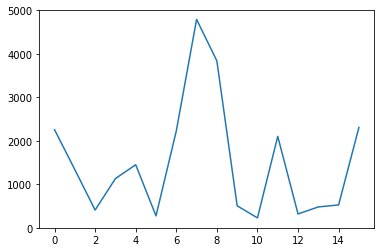

In [4]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

In [9]:
#1.5 and 1.6

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(164, 0), (144, 0), (1686, 0), (270, 0), (1358, 0), (814, 0), (74, 0), (1230, 0), (194, 0), (252, 0), (368, 0), (178, 0), (196, 0), (228, 0), (110, 0), (64, 0), (104, 0), (212, 0), (432, 0), (116, 0), (190, 0), (102, 0), (104, 0), (42, 0), (62, 0), (64, 0), (52, 0), (64, 0), (66, 0), (28, 0), (32, 0), (30, 0), (30, 0), (30, 0), (30, 0), (36, 0), (24, 0), (28, 0), (26, 0), (26, 0)]
Made EGreedy
[(738, 0), (1562, 0), (592, 0), (1828, 0), (482, 0), (902, 0), (554, 0), (362, 0), (294, 0), (354, 0), (132, 0), (96, 0), (480, 0), (320, 0), (150, 0), (270, 0), (580, 0), (278, 0), (130, 0), (134, 0), (346, 0), (370, 0), (1230, 0), (116, 0), (100, 0), (318, 0), (330, 0), (312, 0), (128, 0), (50, 0), (84, 0), (44, 0), (48, 0), (32, 0), (26, 0), (32, 0), (34, 0), (28, 0), (28, 0), (34, 0)]
Made EGreedy
[(700, 0), (1206, 0), (392, 0), (490, 0), (496, 0), (1510, 0), (762, 0), (704, 0), (502, 0), (196, 0), (58, 0), (372, 0), (144, 0), (564, 0

[[10814], [6488], [6214], [9044], [6622], [8418], [5166], [5454], [3108], [2120], [2864], [2510], [2612], [2972], [2488], [1930], [2374], [2608], [1618], [1294], [1226], [908], [2400], [658], [534], [880], [650], [712], [488], [298], [332], [308], [298], [284], [264], [278], [284], [270], [274], [266]]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[1081.4, 648.8, 621.4, 904.4, 662.2, 841.8, 516.6, 545.4, 310.8, 212.0, 286.4, 251.0, 261.2, 297.2, 248.8, 193.0, 237.4, 260.8, 161.8, 129.4, 122.6, 90.8, 240.0, 65.8, 53.4, 88.0, 65.0, 71.2, 48.8, 29.8, 33.2, 30.8, 29.8, 28.4, 26.4, 27.8, 28.4, 27.0, 27.4, 26.6]


(0.0, 2000.0)

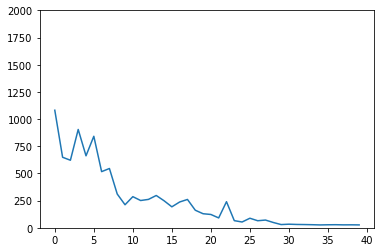

In [12]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 2000)

In [17]:
#1.7

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
epsilons = [0.01, 0.25, 0.5, 0.75]

for ind, eps in enumerate(epsilons):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(238, 0), (1744, 0), (202, 0), (1576, 0), (498, 0), (696, 0), (206, 0), (234, 0), (308, 0), (238, 0), (112, 0), (130, 0), (268, 0), (360, 0), (124, 0), (78, 0), (152, 0), (322, 0), (52, 0), (152, 0), (34, 0), (24, 0), (24, 0), (24, 0), (26, 0), (24, 0), (26, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0), (26, 0), (24, 0), (24, 0), (24, 0), (24, 0), (26, 0)]
Made EGreedy
[(810, 0), (310, 0), (892, 0), (434, 0), (840, 0), (1214, 0), (284, 0), (404, 0), (276, 0), (256, 0), (262, 0), (198, 0), (118, 0), (62, 0), (530, 0), (106, 0), (330, 0), (180, 0), (218, 0), (308, 0), (272, 0), (158, 0), (118, 0), (32, 0), (28, 0), (30, 0), (26, 0), (26, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0), (26, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0)]
Made EGreedy
[(324, 0), (1938, 0), (860, 0), (1618, 0), (276, 0), (946, 0), (138, 0), (206, 0), (220, 0), (138, 0), (102, 0), (266, 0), (348, 0), (158, 0), (516, 0)

[[[14880], [12838], [8170], [12710], [7544], [8086], [4970], [4190], [2202], [2754], [2038], [2858], [3098], [2666], [2650], [2388], [2120], [1874], [1564], [1808], [1300], [1154], [1196], [866], [486], [398], [544], [334], [274], [316], [262], [246], [244], [244], [250], [244], [250], [246], [242], [244]], [[13318], [9868], [15678], [12224], [7152], [8380], [3360], [4524], [2850], [2836], [3260], [2446], [2254], [2786], [1606], [1720], [1406], [2206], [1590], [1036], [694], [1104], [594], [962], [688], [384], [640], [414], [342], [344], [340], [310], [340], [358], [344], [320], [330], [322], [344], [344]], [[12518], [21020], [11320], [6264], [6310], [5296], [4510], [4606], [5486], [3300], [3510], [3670], [2382], [1984], [2334], [1930], [1914], [1318], [2204], [1512], [810], [942], [816], [604], [584], [524], [578], [524], [532], [474], [530], [610], [528], [562], [574], [570], [562], [548], [606], [604]], [[9298], [9802], [11746], [8336], [7848], [8056], [4458], [4910], [3160], [3428]

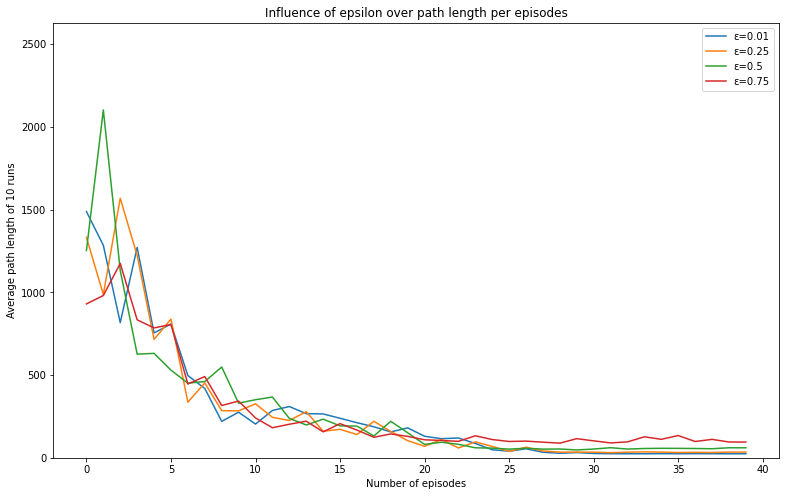

In [20]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of epsilon over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]
[1488.0, 1283.8, 817.0, 1271.0, 754.4, 808.6, 497.0, 419.0, 220.2, 275.4, 203.8, 285.8, 309.8, 266.6, 265.0, 238.8, 212.0, 187.4, 156.4, 180.8, 130.0, 115.4, 119.6, 86.6, 48.6, 39.8, 54.4, 33.4, 27.4, 31.6, 26.2, 24.6, 24.4, 24.4, 25.0, 24.4, 25.0, 24.6, 24.2, 24.4]
[1331.8, 986.8, 1567.8, 1222.4, 715.2, 838.0, 336.0, 452.4, 285.0, 283.6, 326.0, 244.6, 225.4, 278.6, 160.6, 172.0, 140.6, 220.6, 159.0, 103.6, 69.4, 110.4, 59.4, 96.2, 68.8, 38.4, 64.0, 41.4, 34.2, 34.4, 34.0, 31.0, 34.0, 35.8, 34.4, 32.0, 33.0, 32.2, 34.4, 34.4]
[1251.8, 2102.0, 1132.0, 626.4, 631.0, 529.6, 451.0, 460.6, 548.6, 330.0, 351.0, 367.0, 238.2, 198.4, 233.4, 193.0, 191.4, 131.8, 220.4, 151.2, 81.0, 94.2, 81.6, 60.4, 58.4, 52.4, 57.8, 52.4, 53.2, 47.4, 53.0, 61.0, 52.8, 56.2, 57.4, 57.0, 56.2, 54.8, 60.6, 60.4]
[929.8, 980.2, 1174.6, 833.6, 784.8, 805.6, 445.8, 491.0, 316.0, 342.8, 240.8, 181.6, 202.8, 221.2, 156.8, 206.4, 167.4, 124.0, 144.2

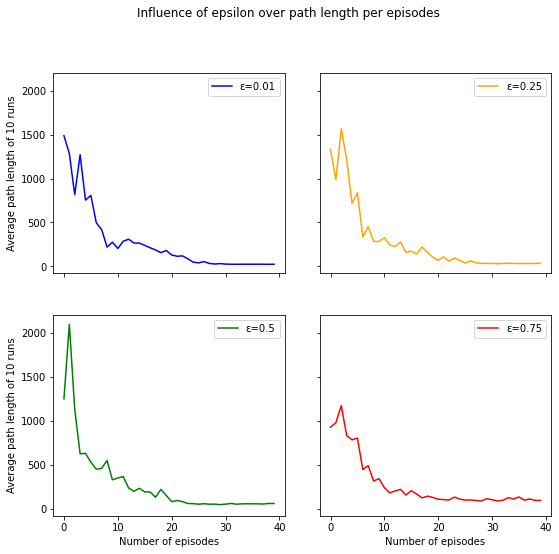

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))
for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, max_y)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

In [30]:
#1.9

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfas = [0.1, 0.5, 0.7, 1]
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for ind, alfa in enumerate(alfas):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(132, 0), (734, 0), (482, 0), (776, 0), (1054, 0), (2040, 0), (334, 0), (84, 0), (294, 0), (204, 0), (58, 0), (224, 0), (96, 0), (98, 0), (242, 0), (62, 0), (214, 0), (288, 0), (38, 0), (40, 0), (84, 0), (64, 0), (46, 0), (24, 0), (44, 0), (28, 0), (26, 0), (30, 0), (36, 0), (24, 0), (34, 0), (24, 0), (30, 0), (26, 0), (26, 0), (26, 0), (26, 0), (24, 0), (26, 0), (28, 0)]
Made EGreedy
[(2074, 0), (1812, 0), (118, 0), (948, 0), (162, 0), (554, 0), (162, 0), (520, 0), (128, 0), (126, 0), (154, 0), (118, 0), (238, 0), (82, 0), (150, 0), (192, 0), (64, 0), (216, 0), (578, 0), (164, 0), (114, 0), (142, 0), (92, 0), (92, 0), (78, 0), (32, 0), (34, 0), (26, 0), (32, 0), (30, 0), (28, 0), (26, 0), (24, 0), (28, 0), (24, 0), (30, 0), (24, 0), (26, 0), (42, 0), (28, 0)]
Made EGreedy
[(746, 0), (658, 0), (814, 0), (196, 0), (226, 0), (542, 0), (122, 0), (84, 0), (102, 0), (300, 0), (136, 0), (410, 0), (462, 0), (148, 0), (412, 0), (106, 0

[[[10304], [9396], [7616], [6448], [6912], [8636], [6696], [3270], [5444], [2110], [1712], [2874], [2848], [1976], [2352], [1188], [2204], [1748], [1558], [1050], [1466], [1030], [1312], [710], [546], [368], [850], [566], [524], [332], [436], [298], [314], [288], [264], [294], [276], [264], [286], [282]], [[8726], [7674], [10628], [8784], [6776], [4166], [5924], [4152], [3302], [2750], [2320], [3540], [3102], [2900], [3002], [3006], [1256], [2428], [1854], [1136], [1496], [722], [988], [740], [556], [368], [326], [324], [290], [334], [302], [270], [302], [256], [284], [290], [262], [270], [270], [292]], [[10036], [11080], [11952], [9548], [7146], [5284], [7154], [5946], [3684], [3044], [2164], [3132], [2414], [2066], [3730], [1670], [2174], [1522], [1782], [1428], [1672], [1018], [1258], [750], [794], [548], [486], [506], [332], [292], [320], [266], [296], [272], [276], [276], [278], [300], [262], [264]], [[8134], [12618], [10174], [7682], [9650], [7372], [6734], [4440], [5000], [3112]

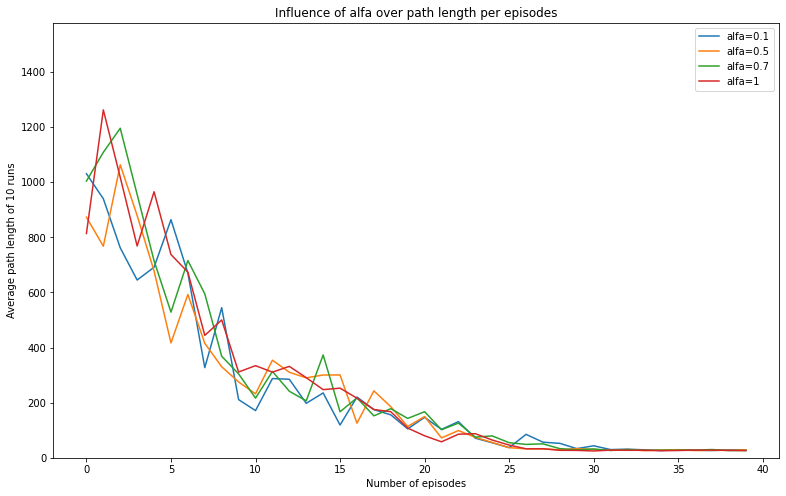

In [31]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of alfa over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]
[1030.4, 939.6, 761.6, 644.8, 691.2, 863.6, 669.6, 327.0, 544.4, 211.0, 171.2, 287.4, 284.8, 197.6, 235.2, 118.8, 220.4, 174.8, 155.8, 105.0, 146.6, 103.0, 131.2, 71.0, 54.6, 36.8, 85.0, 56.6, 52.4, 33.2, 43.6, 29.8, 31.4, 28.8, 26.4, 29.4, 27.6, 26.4, 28.6, 28.2]
[872.6, 767.4, 1062.8, 878.4, 677.6, 416.6, 592.4, 415.2, 330.2, 275.0, 232.0, 354.0, 310.2, 290.0, 300.2, 300.6, 125.6, 242.8, 185.4, 113.6, 149.6, 72.2, 98.8, 74.0, 55.6, 36.8, 32.6, 32.4, 29.0, 33.4, 30.2, 27.0, 30.2, 25.6, 28.4, 29.0, 26.2, 27.0, 27.0, 29.2]
[1003.6, 1108.0, 1195.2, 954.8, 714.6, 528.4, 715.4, 594.6, 368.4, 304.4, 216.4, 313.2, 241.4, 206.6, 373.0, 167.0, 217.4, 152.2, 178.2, 142.8, 167.2, 101.8, 125.8, 75.0, 79.4, 54.8, 48.6, 50.6, 33.2, 29.2, 32.0, 26.6, 29.6, 27.2, 27.6, 27.6, 27.8, 30.0, 26.2, 26.4]
[813.4, 1261.8, 1017.4, 768.2, 965.0, 737.2, 673.4, 444.0, 500.0, 311.2, 334.2, 310.6, 331.6, 290.6, 247.2, 252.6, 216.2, 175.2, 167.2

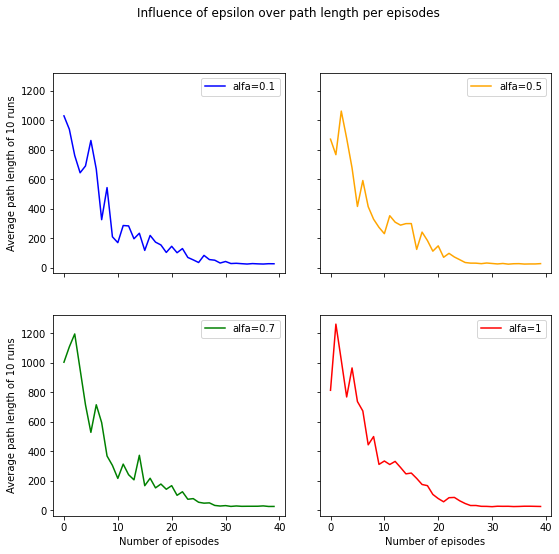

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_episode)
#print(runs_reaching_episode)

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, 1000)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(2143, 1), (763, 1), (811, 1), (616, 0), (306, 0), (517, 1), (438, 0), (207, 1), (163, 1), (490, 0), (242, 0), (387, 1), (310, 0), (467, 1), (133, 1), (241, 1), (316, 0), (327, 1), (106, 0), (382, 0), (273, 1), (209, 1), (274, 0), (331, 1), (94, 0), (615, 1), (145, 1), (147, 1), (418, 0), (174, 0), (221, 1), (307, 1), (393, 1), (246, 0), (196, 0), (344, 0), (118, 0), (212, 0), (220, 0), (386, 0), (163, 1), (414, 0), (256, 0), (135, 1), (176, 0), (290, 0), (249, 1), (448, 0), (112, 0), (276, 0), (177, 1), (514, 0), (564, 0), (304, 0), (218, 0), (388, 0), (86, 0), (240, 0), (378, 0), (461, 1), (218, 0), (179, 1), (700, 0), (171, 1), (367, 1), (147, 1), (81, 1), (370, 0), (122, 0), (334, 0), (389, 1), (98, 0), (279, 1), (172, 0), (169, 1), (163, 1), (261, 1), (230, 0), (719, 1), (236, 0), (339, 1), (635, 1), (101, 1), (332, 0), (360, 0), (175, 1), (237, 1), (97, 1), (277, 1), (78, 0), (112, 0), (763, 1), (361, 1), (189, 1), (356, 

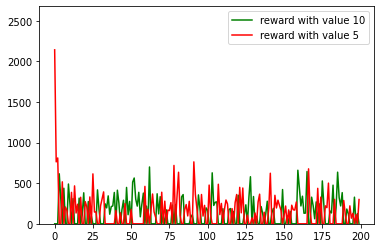

In [67]:
#1.3.10
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
#maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 4
start_eps = 0.9


for runNumber in range(1):
    res = main_algo(alfa=alfa, gamma=gamma, eps=start_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)

print(max_y)

for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


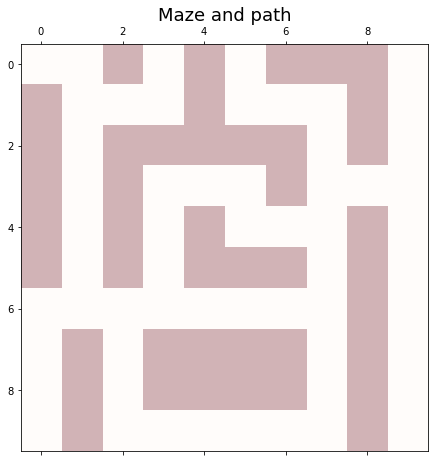

Made EGreedy
[(2547, 1), (147, 1), (355, 1), (1799, 1), (641, 1), (107, 1), (237, 1), (286, 0), (841, 1), (79, 1), (901, 1), (106, 0), (347, 1), (259, 1), (115, 1), (115, 1), (355, 1), (324, 0), (171, 1), (197, 1), (78, 0), (303, 1), (163, 1), (354, 0), (281, 1), (51, 1), (293, 1), (535, 1), (215, 1), (170, 0), (98, 0), (173, 1), (138, 0), (122, 0), (133, 1), (218, 0), (161, 1), (371, 1), (74, 0), (82, 0), (108, 0), (172, 0), (112, 0), (98, 0), (91, 1), (150, 0), (68, 0), (66, 0), (106, 0), (86, 0), (44, 0), (76, 0), (113, 1), (106, 0), (258, 0), (66, 0), (140, 0), (108, 0), (98, 0), (169, 1), (130, 0), (78, 0), (162, 0), (137, 1), (88, 0), (66, 0), (98, 0), (61, 1), (48, 0), (76, 0), (88, 0), (94, 0), (71, 1), (78, 0), (57, 1), (88, 0), (132, 0), (148, 0), (126, 0), (104, 0), (128, 0), (33, 1), (49, 1), (52, 0), (124, 0), (42, 0), (120, 0), (109, 1), (80, 0), (62, 0), (66, 0), (62, 0), (88, 0), (50, 0), (130, 0), (92, 0), (55, 1), (101, 1), (52, 0), (54, 0), (76, 0), (58, 0), (54, 0),

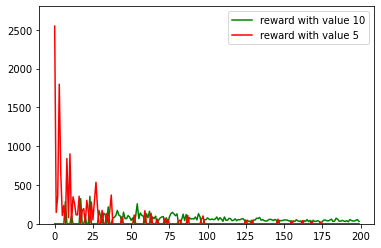

In [62]:
#1.3.11
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995


for runNumber in range(1):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.1)

print(max_y)

for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()